<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
x train shape:  (60000, 28, 28)
y train shape:  (60000,)
x test shape:  (10000, 28, 28)
y test shape:  (10000,)


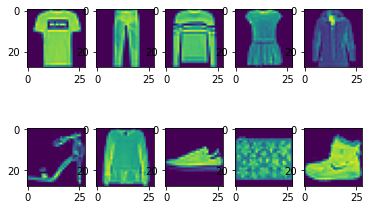

In [ ]:
for i in range(10):
  for j in range(60000):
    if y_train[j] == i:
      plt.subplot(2,5,i+1)
      plt.imshow(x_train[j])
      break

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (60000, 28, 28)
y train shape:  (60000, 10)
x test shape:  (10000, 28, 28)
y test shape:  (10000, 10)
Max x train  1.0
Min x train  0.0


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),verbose=1)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
model_json = model.to_json()
with open('drive/MyDrive/Model/Fashion_MNIST/fashion_mnist_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Fashion_MNIST/fashion_mnist_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 154s 82ms/step - loss: 0.3807 - accuracy: 0.8630 - val_loss: 0.3033 - val_accuracy: 0.8899
Epoch 2/20
1875/1875 [==============================] - 153s 81ms/step - loss: 0.2393 - accuracy: 0.9118 - val_loss: 0.2601 - val_accuracy: 0.9053
Epoch 3/20
1875/1875 [==============================] - 153s 81ms/step - loss: 0.1927 - accuracy: 0.9287 - val_loss: 0.2397 - val_accuracy: 0.9136
Epoch 4/20
1875/1875 [==============================] - 153s 82ms/step - loss: 0.1561 - accuracy: 0.9424 - val_loss: 0.2511 - val_accuracy: 0.9140
Epoch 5/20
1875/1875 [==============================] - 153s 81ms/step - loss: 0.1299 - accuracy: 0.9523 - val_loss: 0.2450 - val_accuracy: 0.9150
Epoch 6/20
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1054 - accuracy: 0.9611 - val_loss: 0.2719 - val_accuracy: 0.9137
Epoch 7/20
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0828 - accuracy: 0.9697 - val_loss: 0

FileNotFoundError: ignored

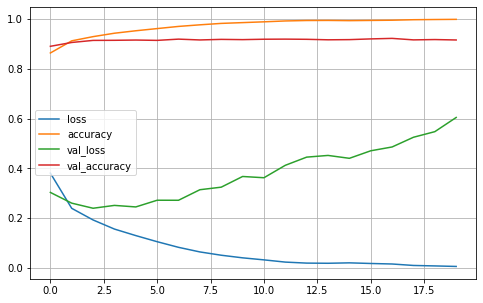

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


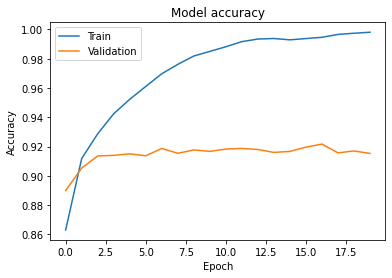

In [ ]:
with open('drive/MyDrive/Model/Fashion_MNIST/fashion_mnist_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Fashion_MNIST/fashion_mnist_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Trouser


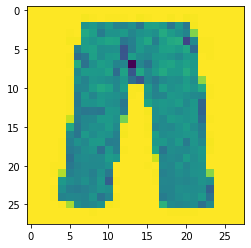

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
url = 'drive/MyDrive/data_test/fashion_mnist/test'+str(5)+'.jpg'
img = load_img(url,target_size=(28,28),grayscale=True)
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = 255.0 - img
img = img/255
print(label[np.argmax(model.predict(img),axis=1)[0]])
